# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. 
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).


In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
#!pip install -q pyodbc openpyxl

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data Connection
import pyodbc

# Data handling
import pandas as pd

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt

# EDA (pandas-profiling, etc. )
...
#import ydata_profiling
#from ydata_profiling import ProfileReport

# Feature Processing (Scikit-learn processing, etc. )
...

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle, warnings
from onedrivedownloader import download

warnings.filterwarnings('ignore')


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
# Directory Environment
BASE_DIR = '.'
DATA_DIR = os.path.join(BASE_DIR, 'data')
TRAIN_FILE = os.path.join(DATA_DIR, 'LP2_Telco_Churn_First.csv')
TEST_FILE = os.path.join(DATA_DIR, 'Telco-churn-second-2000.xlsx.csv')
#SAMPLESUB_FILE = os.path.join(DATA_DIR, 'sample_submission.csv')

## Connecting to the MS-SQL SERVER Database: First Dataset

In [4]:
# Connecting to the Online Dataset on an MS-SQL SERVER
SERVER = 'dap-projects-database.database.windows.net'
DATABASE = 'dapDB'
USERNAME = 'dataAnalyst_LP2'
PASSWORD = 'A3g@3kR$2y'

# This will connection string is an f string that includes all the variable above to extablish a connection to the server
connection_string = f"DRIVER={{SQL Server}};SERVER={SERVER};DATABASE={DATABASE};UID={USERNAME};PWD={PASSWORD}"

In [5]:
# Python ODBC Connection to the Database
connection = pyodbc.connect(connection_string)

In [6]:
# Querying the online dataset for all the values in the table
query = "Select * from dbo.LP2_Telco_churn_first_3000"

# Accessing the query result into a Panda Dataframe
online_data = pd.read_sql(query, connection)

In [7]:
# Verifying whether the connection is established
online_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [8]:
# Saving Online Dataset as .csv in local directory
online_data.to_csv(TRAIN_FILE)

## Connecting to the OneDrive Excel File: Second Dataset

In [9]:
# Connecting to the excel file through the shared link
ln = "https://azubiafrica-my.sharepoint.com/:f:/r/personal/teachops_azubiafrica_org/Documents/Career%20Accelerator%20Data_Sets/LP2%20Datasets?download=1"

# Accessing the excel file into a Panda Dataframe
onedrive_data = pd.read_excel(download(ln, filename="./data/Telco-churn-second-2000.xlsx"))

In [10]:
onedrive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


## Connecting to the .csv File from GitHub: Third Dataset

In [11]:
git_data = pd.read_csv('./data/LP2_Telco-churn-last-2000.csv')

In [12]:
git_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

In [13]:
# Code here
df_train = pd.read_csv(TRAIN_FILE)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3000 non-null   int64  
 1   customerID        3000 non-null   object 
 2   gender            3000 non-null   object 
 3   SeniorCitizen     3000 non-null   bool   
 4   Partner           3000 non-null   bool   
 5   Dependents        3000 non-null   bool   
 6   tenure            3000 non-null   int64  
 7   PhoneService      3000 non-null   bool   
 8   MultipleLines     2731 non-null   object 
 9   InternetService   3000 non-null   object 
 10  OnlineSecurity    2349 non-null   object 
 11  OnlineBackup      2349 non-null   object 
 12  DeviceProtection  2349 non-null   object 
 13  TechSupport       2349 non-null   object 
 14  StreamingTV       2349 non-null   object 
 15  StreamingMovies   2349 non-null   object 
 16  Contract          3000 non-null   object 


In [15]:
df_train.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [16]:
#profile = ProfileReport(df_train, title='Train Dataset', html={'style':{'full_width':True}})
##profile.to_notebook_iframe()
#profile.to_file('[Trainset] Pandas-Profiling_Report.html')

In [17]:
## Univariant Analysis

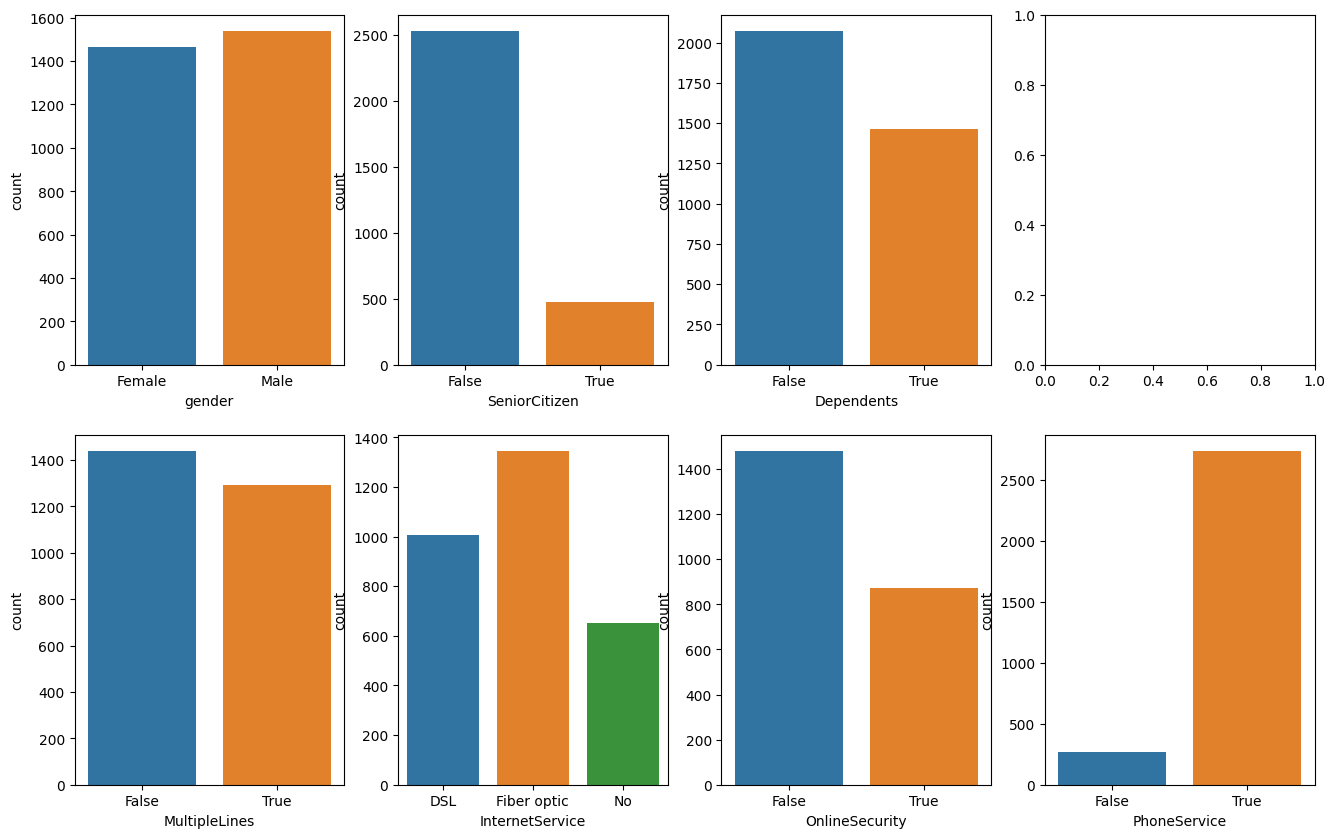

In [18]:
fig, axes = plt.subplots(2,4, figsize=(16,10))
sns.countplot(data=df_train, x='gender',ax=axes[0,0])
sns.countplot(data=df_train, x='SeniorCitizen',ax=axes[0,1])
sns.countplot(data=df_train, x='Partner',ax=axes[0,2])
sns.countplot(data=df_train, x='Dependents',ax=axes[0,2])
sns.countplot(data=df_train, x='PhoneService',ax=axes[1,3])
sns.countplot(data=df_train, x='MultipleLines',ax=axes[1,0])
sns.countplot(data=df_train, x='InternetService',ax=axes[1,1])
sns.countplot(data=df_train, x='OnlineSecurity',ax=axes[1,2])
plt.show()


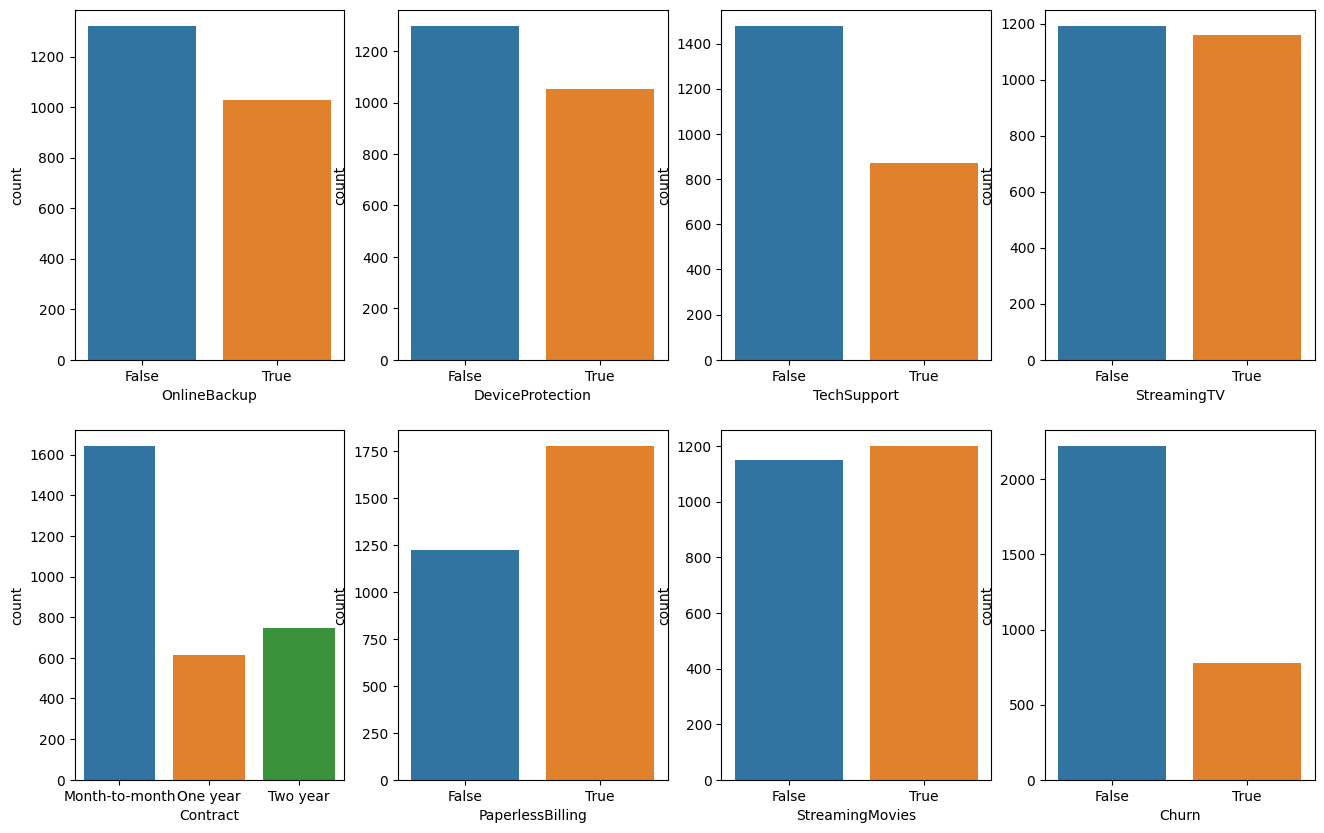

In [19]:
fig, axes = plt.subplots(2,4, figsize=(16,10))

sns.countplot(data=df_train, x='OnlineBackup',ax=axes[0,0])
sns.countplot(data=df_train, x='DeviceProtection',ax=axes[0,1])
sns.countplot(data=df_train, x='TechSupport',ax=axes[0,2])
sns.countplot(data=df_train, x='StreamingTV',ax=axes[0,3])
sns.countplot(data=df_train, x='Contract',ax=axes[1,0])
sns.countplot(data=df_train, x='PaperlessBilling',ax=axes[1,1])
sns.countplot(data=df_train, x='Churn',ax=axes[1,3])
sns.countplot(data=df_train, x='StreamingMovies',ax=axes[1,2])
plt.show()


<Axes: xlabel='count', ylabel='PaymentMethod'>

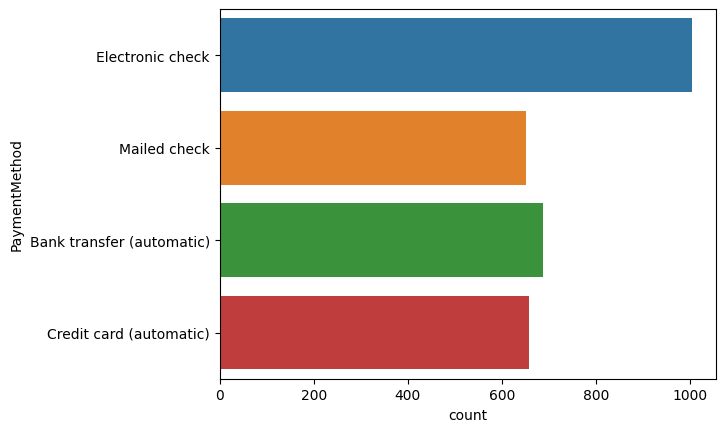

In [20]:
sns.countplot(data=df_train, y='PaymentMethod')

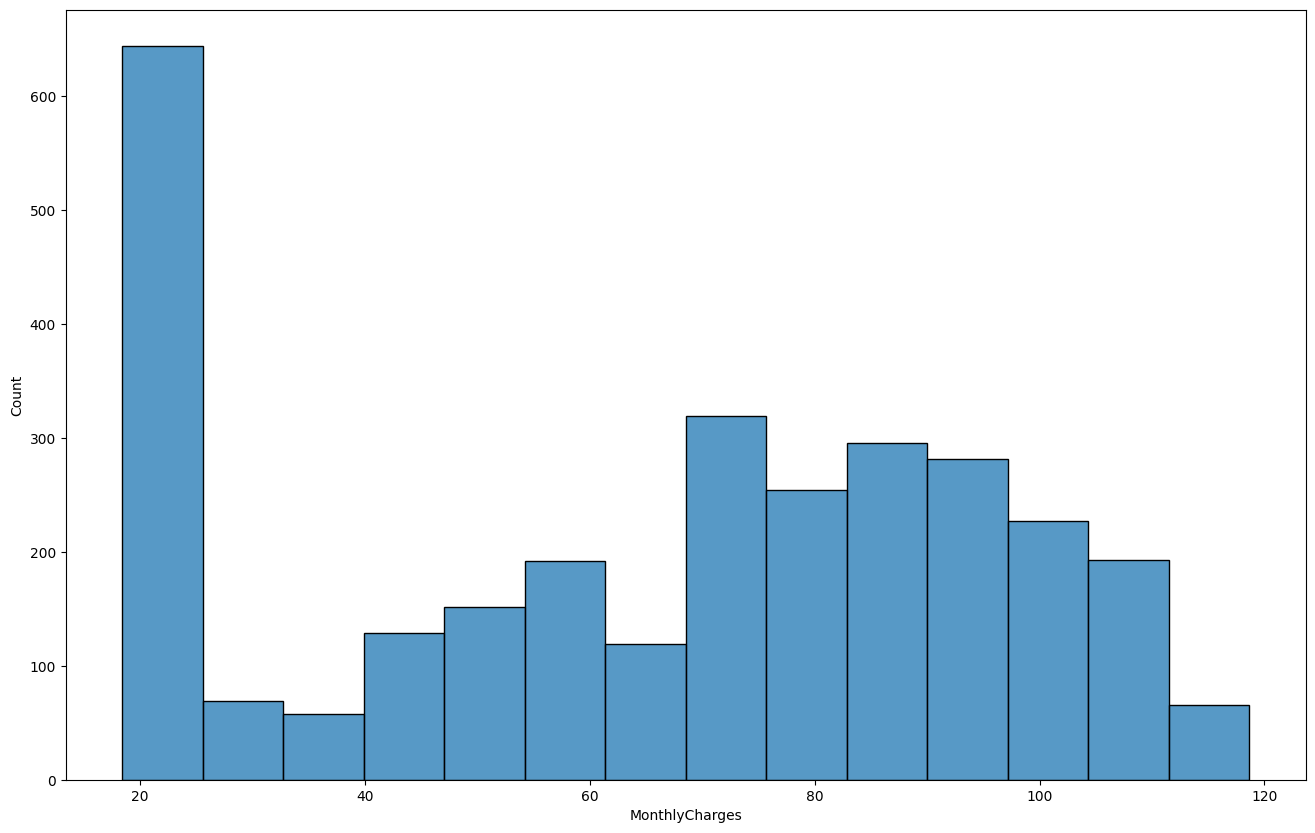

In [21]:
fig, axes = plt.subplots(1,1, figsize=(16,10))

sns.histplot(data=df_train, x='MonthlyCharges')
plt.show()

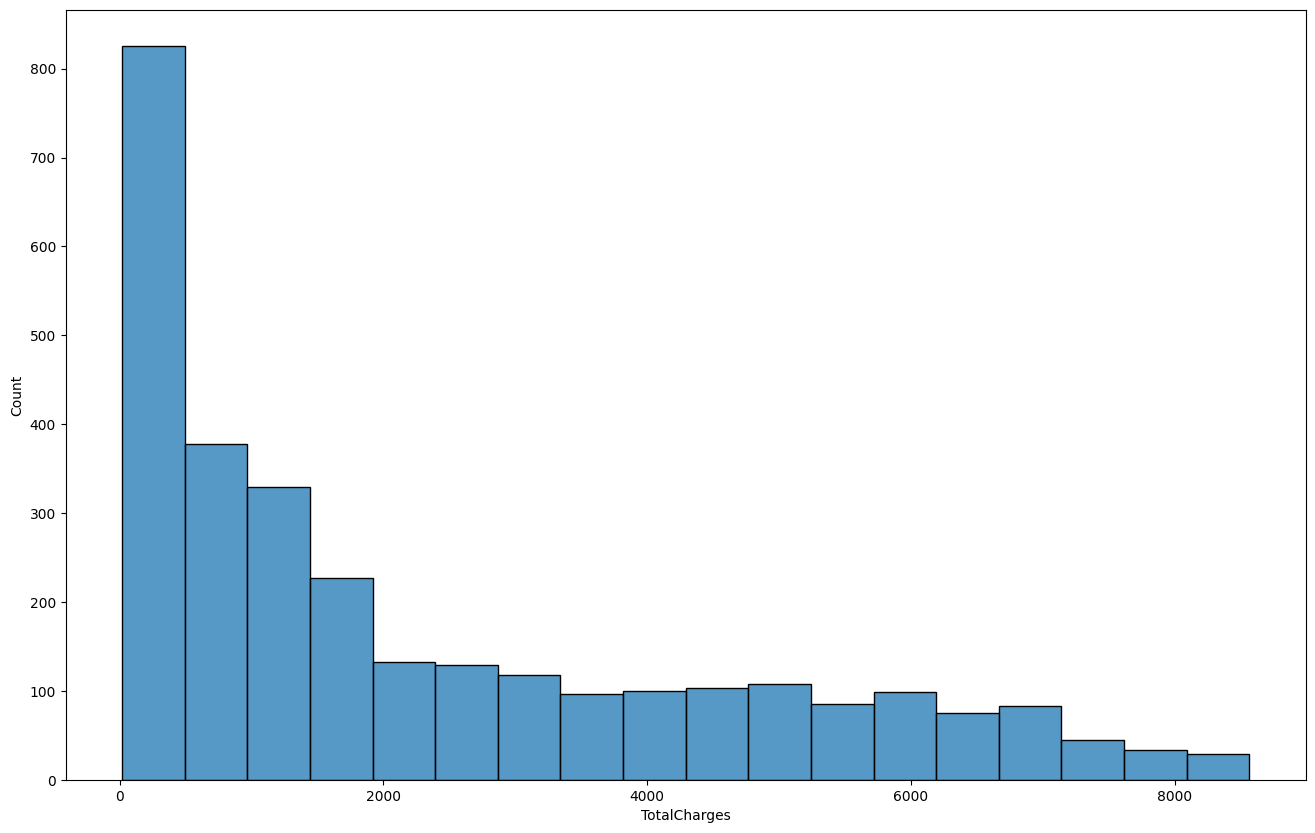

In [22]:
fig, axes = plt.subplots(1,1, figsize=(16,10))

sns.histplot(data=df_train, x='TotalCharges')
plt.show()

## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

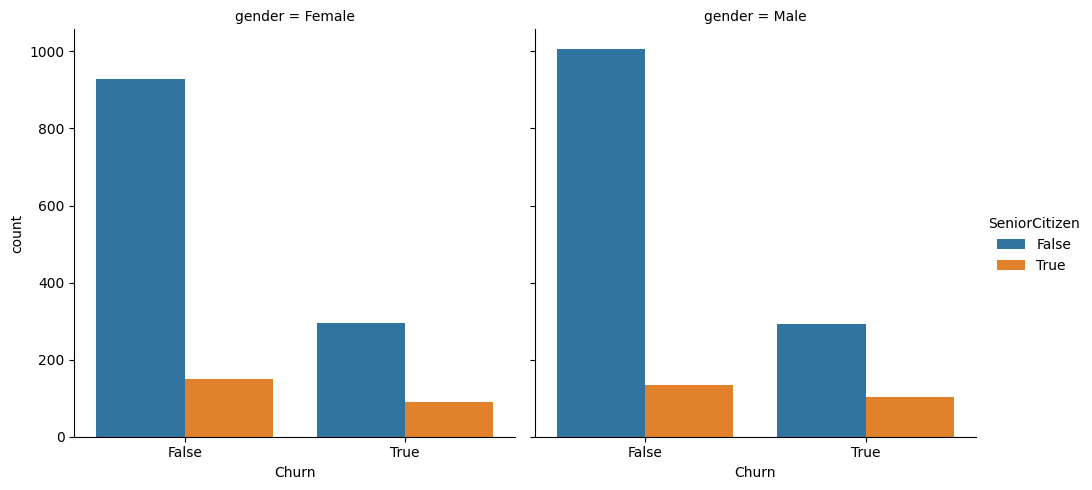

In [23]:
# Code here
# How many people have churned and whether or not they were senior citizens?
sns.catplot(data=df_train, x='Churn', kind='count', col='gender', hue='SeniorCitizen')

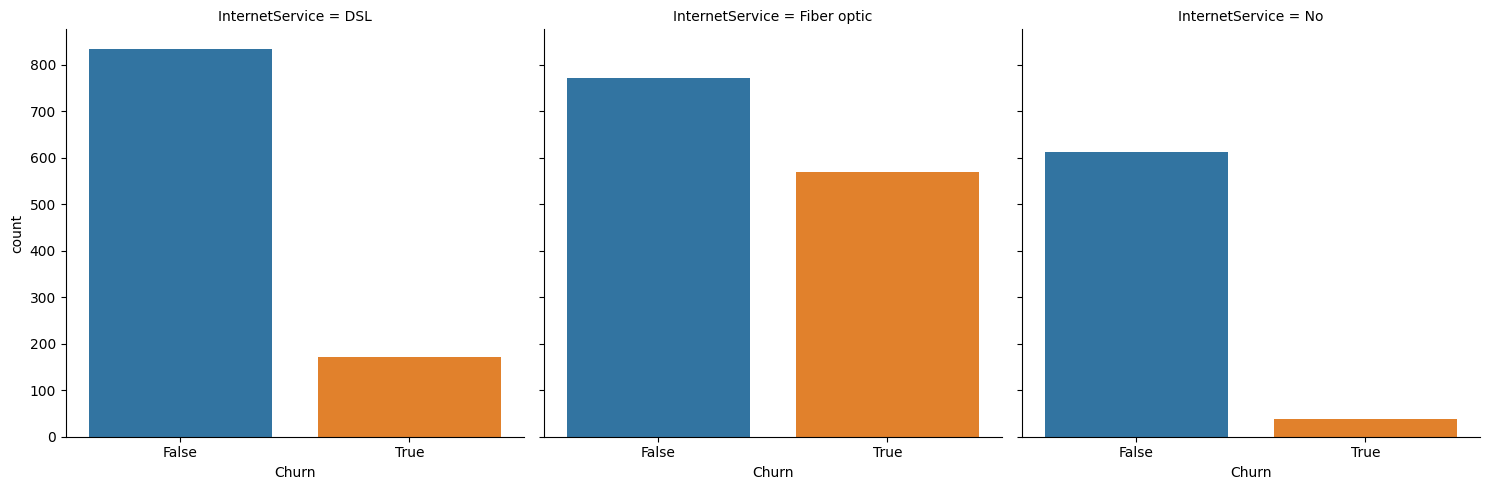

In [25]:
# How many people have churned and they had subscribed to the internet service?
sns.catplot(data=df_train, x='Churn', kind='count', col='InternetService')
plt.show()

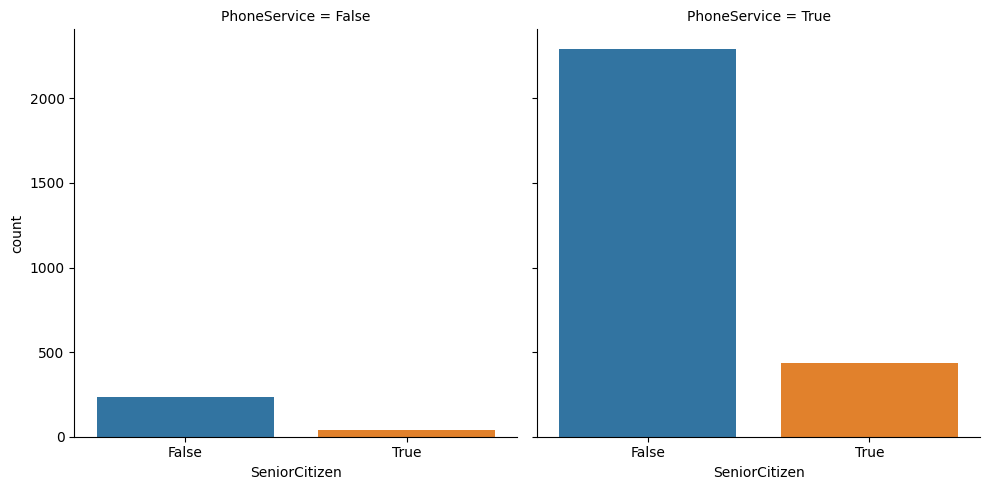

In [27]:
# Which demography patronises more of the Phone Service?
sns.catplot(data=df_train, x='SeniorCitizen', kind='count', col='PhoneService')
plt.show()

In [ ]:
#sns.catplot(data=df_train, x='TotalCharges', kind='count', col='tenure')

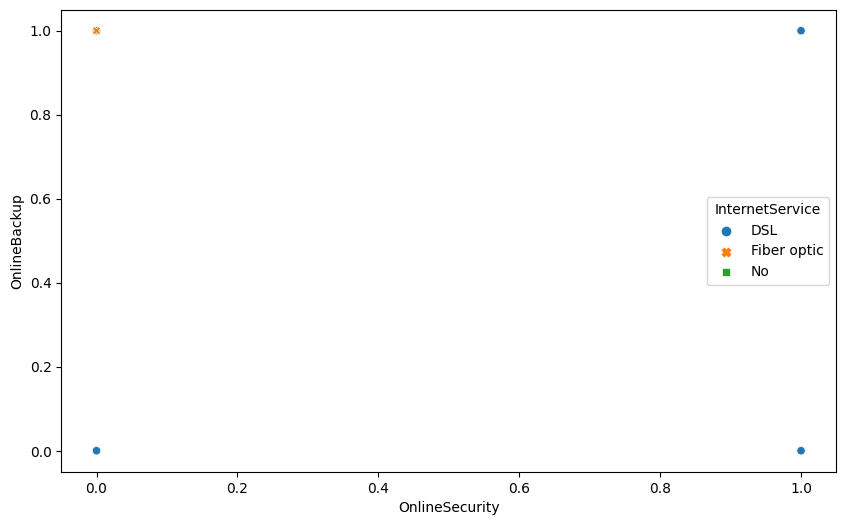

In [62]:
# How does InternetService relate to other services?
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df_train, x="OnlineSecurity", y="OnlineBackup", hue="InternetService", style="InternetService")
plt.show()

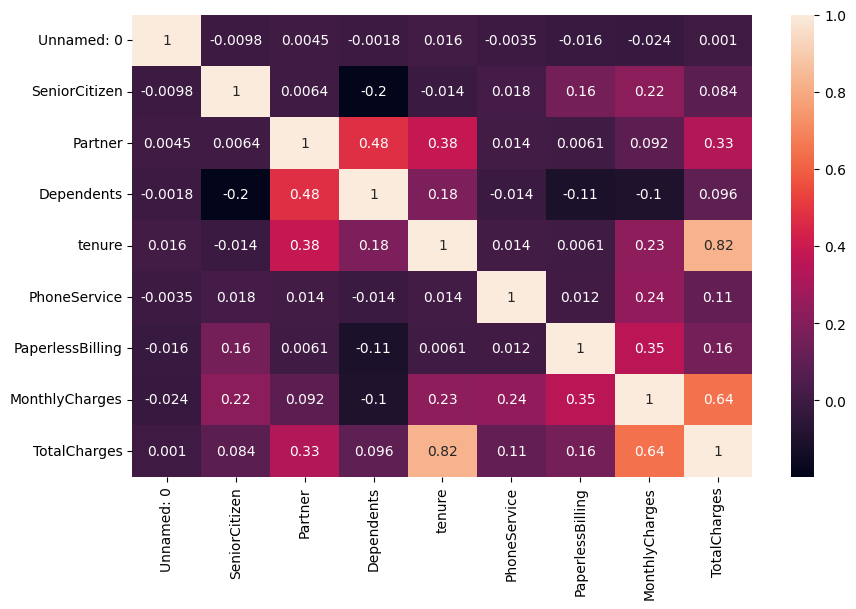

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [30]:
# Use pandas.DataFrame.drop_duplicates method
df_train.duplicated().sum()

0

## Dataset Splitting

In [ ]:
# Use train_test_split with a random_state, and add stratify for Classification


## Handling Missing Values

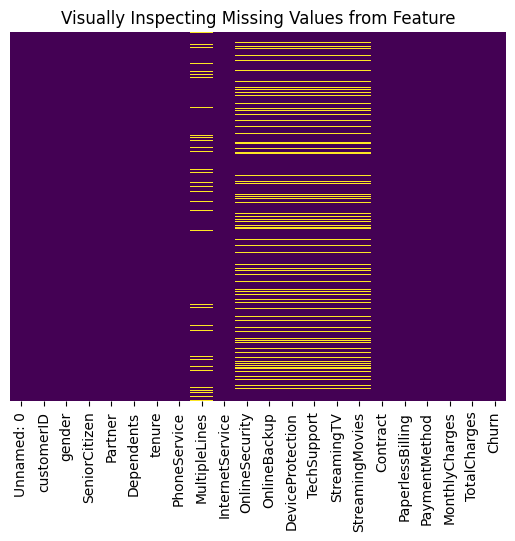

In [33]:
#Visually inspecting missing values
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Visually Inspecting Missing Values from Feature')
plt.show()

In [37]:
percentage_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_values_df = pd.DataFrame({'column_name': df_train.columns,\
                                  'percentage_missing': percentage_missing})
missing_values_df

,column_name,percentage_missing
Unnamed: 0,Unnamed: 0,0.000000
customerID,customerID,0.000000
gender,gender,0.000000
SeniorCitizen,SeniorCitizen,0.000000
Partner,Partner,0.000000
Dependents,Dependents,0.000000
tenure,tenure,0.000000
PhoneService,PhoneService,0.000000
MultipleLines,MultipleLines,8.966667
InternetService,InternetService,0.000000


In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3000 non-null   int64  
 1   customerID        3000 non-null   object 
 2   gender            3000 non-null   object 
 3   SeniorCitizen     3000 non-null   bool   
 4   Partner           3000 non-null   bool   
 5   Dependents        3000 non-null   bool   
 6   tenure            3000 non-null   int64  
 7   PhoneService      3000 non-null   bool   
 8   MultipleLines     2731 non-null   object 
 9   InternetService   3000 non-null   object 
 10  OnlineSecurity    2349 non-null   object 
 11  OnlineBackup      2349 non-null   object 
 12  DeviceProtection  2349 non-null   object 
 13  TechSupport       2349 non-null   object 
 14  StreamingTV       2349 non-null   object 
 15  StreamingMovies   2349 non-null   object 
 16  Contract          3000 non-null   object 


In [82]:
df_train['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [83]:
df_train.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

## Impute Missing Values

In [ ]:
# Use sklearn.impute.SimpleImputer

## New Features Creation

In [ ]:
# Code here

## Features Encoding




In [ ]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.

## Features Scaling


In [ ]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.

## Optional: Train set Balancing (for Classification only)

In [ ]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001

Please, keep the following structure to try all the model you want.

### Create the Model

In [ ]:
# Code here

### Train the Model

In [ ]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Simple Model #002

### Create the Model

In [ ]:
# Code here

### Train the Model

In [ ]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [ ]:
# Code here

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [ ]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app